## Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Các hàm tạo sẵn

In [3]:
def cols_null_rate_more_than(df, null_rate:float=0.8):
    null_df_rate = df.isnull().sum()/len(df)
    return null_df_rate[null_df_rate > null_rate].index

## Đọc data

In [4]:
sale_detail_df = pd.read_excel(r'C:\Users\Asus\Downloads\AdventureWork2022\data\OrderDetail.xlsx')
sale_detail_df.head()

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,2019-07-13,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,2011-05-31
1,2019-07-13,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,2011-05-31
2,2019-07-13,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,2011-05-31
3,2019-07-13,4,4911-403C-98,1,771,1,2039.994,0.0,2039.994,04C4DE91-5815-45D6-8670-F462719FBCE3,2011-05-31
4,2019-07-13,5,4911-403C-98,1,772,1,2039.994,0.0,2039.994,5A74C7D2-E641-438E-A7AC-37BF23280301,2011-05-31


In [5]:
sale_detail_df.isnull().sum()

SalesOrderID                 0
SalesOrderDetailID           0
CarrierTrackingNumber    60398
OrderQty                     0
ProductID                    0
SpecialOfferID               0
UnitPrice                    0
UnitPriceDiscount            0
LineTotal                    0
rowguid                      0
ModifiedDate                 0
dtype: int64

In [6]:
null_rate = 0.8
print(f"Những cột trong sale_detail_df có null từ {null_rate*100}% trở lên: {cols_null_rate_more_than(sale_detail_df, null_rate)}")

Những cột trong sale_detail_df có null từ 80.0% trở lên: Index([], dtype='object')


In [7]:
customer_df = pd.read_excel(r'C:\Users\Asus\Downloads\AdventureWork2022\data\Customer.xlsx')
customer_df.head()

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12


In [8]:
customer_df = customer_df[~customer_df["PersonID"].isnull()]

In [9]:
null_rate = 0.8
print(f"Những cột trong customer_df có null từ {null_rate*100}% trở lên: {cols_null_rate_more_than(customer_df, null_rate)}")

Những cột trong customer_df có null từ 80.0% trở lên: Index(['StoreID'], dtype='object')


In [10]:
sale_header_df = pd.read_excel(r'C:\Users\Asus\Downloads\AdventureWork2022\data\OrderHeader.xlsx')
sale_header_df.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,2019-07-13,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43659,PO522145787,10-4020-000676,...,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,NaN,79B65321-39CA-4115-9CBA-8FE0903E12E6,2011-06-07
1,2019-07-14,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43660,PO18850127500,10-4020-000117,...,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,NaN,738DC42D-D03B-48A1-9822-F95A67EA7389,2011-06-07
2,2019-07-15,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43661,PO18473189620,10-4020-000442,...,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,NaN,D91B9131-18A4-4A11-BC3A-90B6F53E9D74,2011-06-07
3,2019-07-16,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43662,PO18444174044,10-4020-000227,...,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,NaN,4A1ECFC0-CC3A-4740-B028-1C50BB48711C,2011-06-07
4,2019-07-17,8,2011-05-31,2011-06-12,2011-06-07,5,0,SO43663,PO18009186470,10-4020-000510,...,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,NaN,9B1E7A40-6AE0-4AD3-811C-A64951857C4B,2011-06-07


In [11]:
sale_header_df.isnull().sum()

SalesOrderID                  0
RevisionNumber                0
OrderDate                     0
DueDate                       0
ShipDate                      0
Status                        0
OnlineOrderFlag               0
SalesOrderNumber              0
PurchaseOrderNumber       27659
AccountNumber                 0
CustomerID                    0
SalesPersonID             27659
TerritoryID                   0
BillToAddressID               0
ShipToAddressID               0
ShipMethodID                  0
CreditCardID               1131
CreditCardApprovalCode     1131
CurrencyRateID            17489
SubTotal                      0
TaxAmt                        0
Freight                       0
TotalDue                      0
Comment                   31465
rowguid                       0
ModifiedDate                  0
dtype: int64

In [12]:
null_rate = 0.8
print(f"Những cột trong sale_header_df có null từ {null_rate*100}% trở lên: {cols_null_rate_more_than(sale_header_df, null_rate)}")

Những cột trong sale_header_df có null từ 80.0% trở lên: Index(['PurchaseOrderNumber', 'SalesPersonID', 'Comment'], dtype='object')


In [13]:
person_df = pd.read_excel(r'C:\Users\Asus\Downloads\AdventureWork2022\data\Person.xlsx')
person_df.head()


,BusinessEntityID,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics,rowguid,ModifiedDate
0,1,EM,0,NaN,Ken,J,Sánchez,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",92C4279F-1207-48A3-8448-4636514EB7E2,2009-01-07
1,2,EM,0,NaN,Terri,Lee,Duffy,NaN,1,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",D8763459-8AA8-47CC-AFF7-C9079AF79033,2008-01-24
2,3,EM,0,NaN,Roberto,NaN,Tamburello,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",E1A2555E-0828-434B-A33B-6F38136A37DE,2007-11-04
3,4,EM,0,NaN,Rob,NaN,Walters,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",F2D7CE06-38B3-4357-805B-F4B6B71C01FF,2007-11-28
4,5,EM,0,Ms.,Gail,A,Erickson,NaN,0,NaN,"<IndividualSurvey xmlns=""http://schemas.micros...",F3A3F6B4-AE3B-430C-A754-9F2231BA6FEF,2007-12-30


In [14]:
person_df.isnull().sum()

BusinessEntityID             0
PersonType                   0
NameStyle                    0
Title                    18963
FirstName                    0
MiddleName                8499
LastName                     0
Suffix                   19919
EmailPromotion               0
AdditionalContactInfo    19962
Demographics                 0
rowguid                      0
ModifiedDate                 0
dtype: int64

In [15]:
null_rate = 0.8
print(f"Những cột trong person_df có null từ {null_rate*100}% trở lên: {cols_null_rate_more_than(person_df, null_rate)}")

Những cột trong person_df có null từ 80.0% trở lên: Index(['Title', 'Suffix', 'AdditionalContactInfo'], dtype='object')


In [16]:
product_df = pd.read_excel(r'C:\Users\Asus\Downloads\AdventureWork2022\data\Product.xlsx')
product_df.head()


,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08
1,2,Bearing Ball,BA-8327,0,0,NaN,1000,750,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08
2,3,BB Ball Bearing,BE-2349,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08
3,4,Headset Ball Bearings,BE-2908,0,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B,2014-02-08
4,316,Blade,BL-2036,1,0,NaN,800,600,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,2008-04-30,NaN,NaN,E73E9750-603B-4131-89F5-3DD15ED5FF80,2014-02-08


In [17]:
null_rate = 0.8
print(f"Những cột trong product_df có null từ {null_rate*100}% trở lên: {cols_null_rate_more_than(product_df, null_rate)}")

Những cột trong product_df có null từ 80.0% trở lên: Index(['SellEndDate', 'DiscontinuedDate'], dtype='object')


In [18]:
territory_df = pd.read_excel(r'C:\Users\Asus\Downloads\AdventureWork2022\data\Territory.xlsx')
territory_df.head()

,TerritoryID,Name,CountryRegionCode,Group,SalesYTD,SalesLastYear,CostYTD,CostLastYear,rowguid,ModifiedDate
0,1,Northwest,US,North America,7.887187e+06,3298694.494,0,0,43689A10-E30B-497F-B0DE-11DE20267FF7,2008-04-30
1,2,Northeast,US,North America,2.402177e+06,3607148.937,0,0,00FB7309-96CC-49E2-8363-0A1BA72486F2,2008-04-30
2,3,Central,US,North America,3.072175e+06,3205014.077,0,0,DF6E7FD8-1A8D-468C-B103-ED8ADDB452C1,2008-04-30
3,4,Southwest,US,North America,1.051085e+07,5366575.710,0,0,DC3E9EA0-7950-4431-9428-99DBCBC33865,2008-04-30
4,5,Southeast,US,North America,2.538667e+06,3925071.432,0,0,6DC4165A-5E4C-42D2-809D-4344E0AC75E7,2008-04-30


In [19]:
territory_df.isnull().sum()

TerritoryID          0
Name                 0
CountryRegionCode    0
Group                0
SalesYTD             0
SalesLastYear        0
CostYTD              0
CostLastYear         0
rowguid              0
ModifiedDate         0
dtype: int64

In [20]:
null_rate = 0.8
print(f"Những cột trong territory_df có null từ {null_rate*100}% trở lên: {cols_null_rate_more_than(territory_df, null_rate)}")

Những cột trong territory_df có null từ 80.0% trở lên: Index([], dtype='object')


## EDA theo yêu cầu

### 1. Thống kê doanh thu, số lượng đơn hàng theo thời gian, sản phẩm, khu vực.

Các cột ta sẽ sử dụng ở đây:
+ TotalDue: Doanh thu (Từ bảng OrderHeader)
+ PurchaseOrderID: ID đơn hàng (Từ bảng OrderHeader)
+ OrderDate: Ngày đặt hàng (Từ bảng OrderHeader)
+ Name: Tên sản phẩm (Từ bảng Product)
+ ProductID: ID sản phẩm (Từ bảng Product)
+ TerritoryID: ID khu vực (Từ bảng Territory)
+ Name: Tên sản phẩm (Từ bảng Territory)
+ OrderQty: Số lượng bán ra từng sản phẩm (Từ bảng OrderDetail)

In [21]:
# Check TotalDue có bị lỗi dữ liệu không
sale_header_df[sale_header_df["TotalDue"] < 0]

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,...,CreditCardID,CreditCardApprovalCode,CurrencyRateID,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate


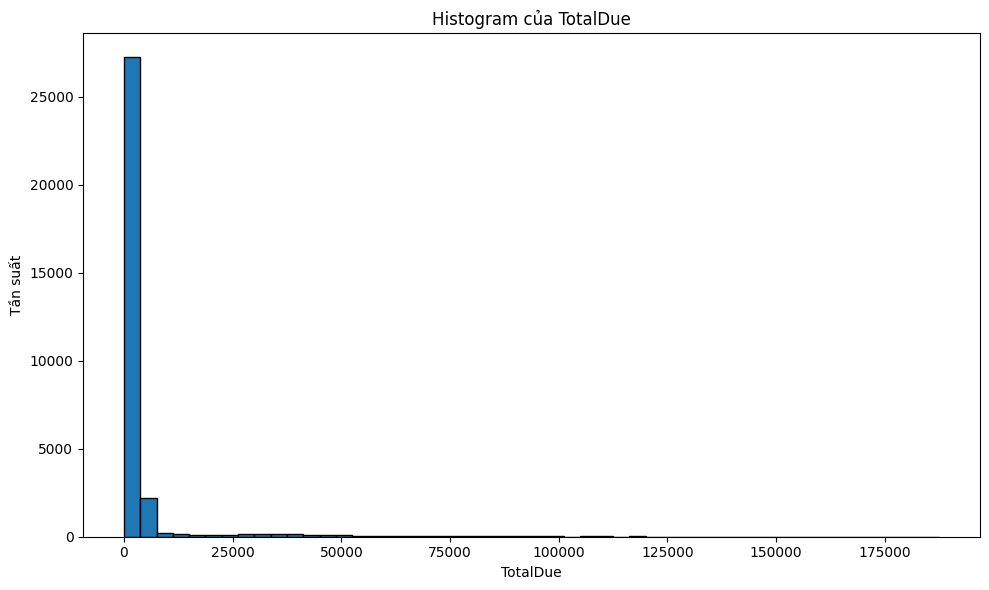

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(sale_header_df["TotalDue"], bins=50, edgecolor='black')
plt.xlabel('TotalDue')
plt.ylabel('Tần suất')
plt.title('Histogram của TotalDue')
plt.tight_layout()
plt.show()

#### Doanh thu theo thời gian

In [23]:
# Doanh thu theo thời gian
revenue_by_time = sale_header_df.groupby("OrderDate")["TotalDue"].sum().sort_index()

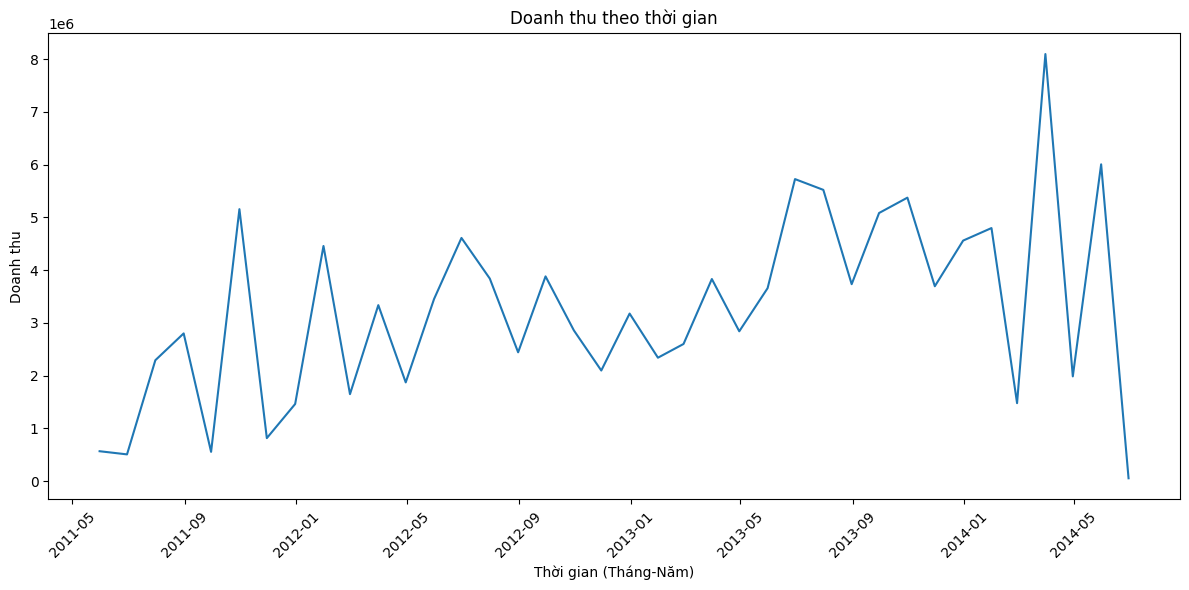

In [24]:
# Chuyển đổi index sang định dạng tháng-năm và tính tổng doanh thu theo tháng
revenue_by_month = revenue_by_time.copy()
revenue_by_month.index = pd.to_datetime(revenue_by_month.index)
revenue_by_month = revenue_by_month.resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(revenue_by_month.index, revenue_by_month.values)
plt.xlabel('Thời gian (Tháng-Năm)')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo thời gian')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Doanh thu theo từng tháng:
Month
1     1.159643e+07
2     5.727484e+06
3     1.526499e+07
4     6.698521e+06
5     1.368421e+07
6     1.089816e+07
7     1.165426e+07
8     8.977000e+06
9     9.520021e+06
10    1.338871e+07
11    6.607134e+06
12    9.199874e+06
Name: TotalDue, dtype: float64


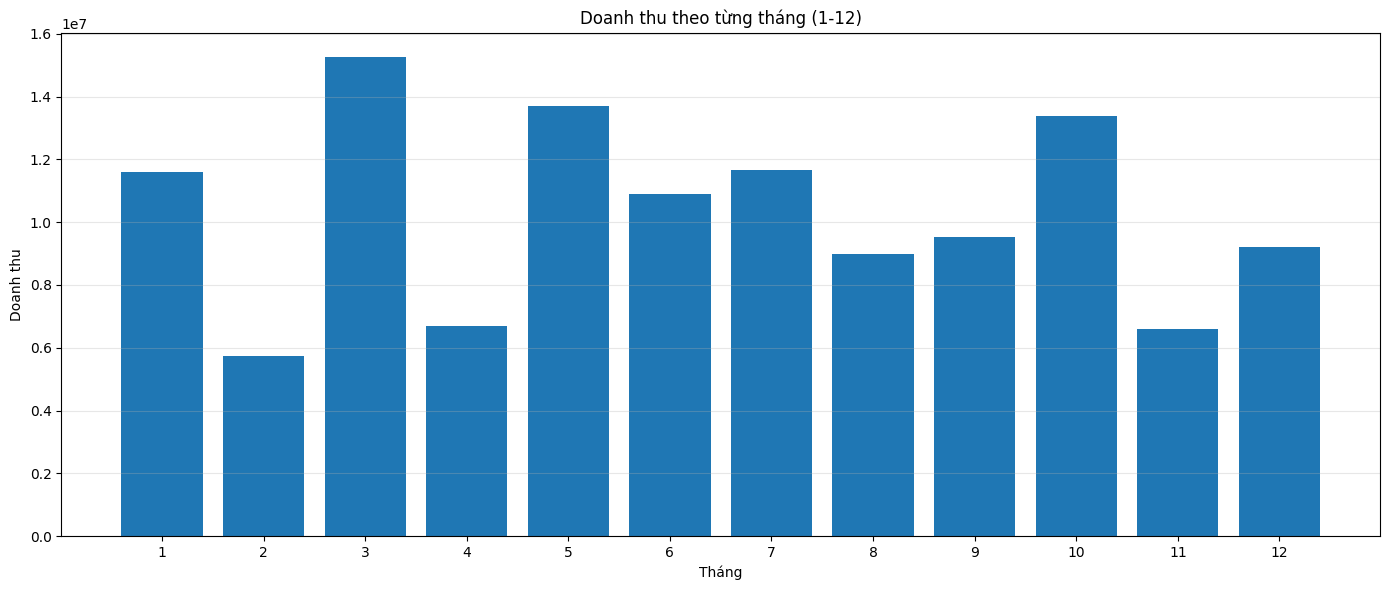

In [25]:
# Doanh thu theo từng tháng (tháng 1-12)
revenue_by_month = sale_header_df.copy()
revenue_by_month['Month'] = pd.to_datetime(revenue_by_month['OrderDate']).dt.month
revenue_by_month = revenue_by_month.groupby('Month')['TotalDue'].sum()

# Hiển thị doanh thu theo tháng
print("Doanh thu theo từng tháng:")
print(revenue_by_month)

plt.figure(figsize=(14, 6))
plt.bar(revenue_by_month.index, revenue_by_month.values)
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo từng tháng (1-12)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

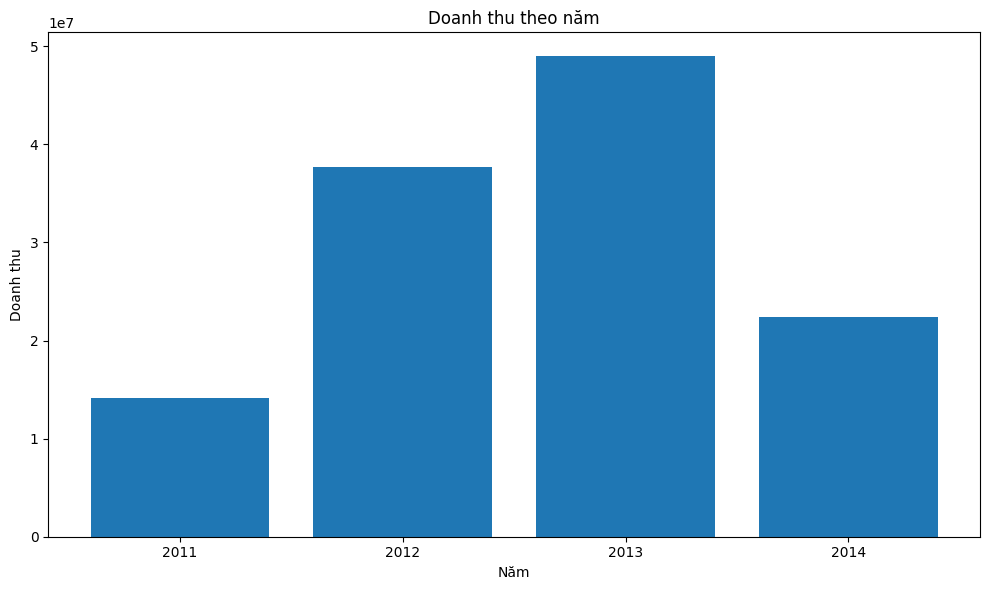

In [26]:
# Doanh thu theo thời gian
# Doanh thu theo năm
revenue_by_year = sale_header_df.copy()
revenue_by_year['Year'] = pd.to_datetime(revenue_by_year['OrderDate']).dt.year
revenue_by_year = revenue_by_year.groupby('Year')['TotalDue'].sum()

plt.figure(figsize=(10, 6))
plt.bar(revenue_by_year.index, revenue_by_year.values)
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo năm')
plt.xticks(revenue_by_year.index)
plt.tight_layout()
plt.show()


#### Số lượng đơn hàng theo thời gian

In [27]:
order_quantity_by_time = sale_header_df.groupby("OrderDate")["SalesOrderID"].count()

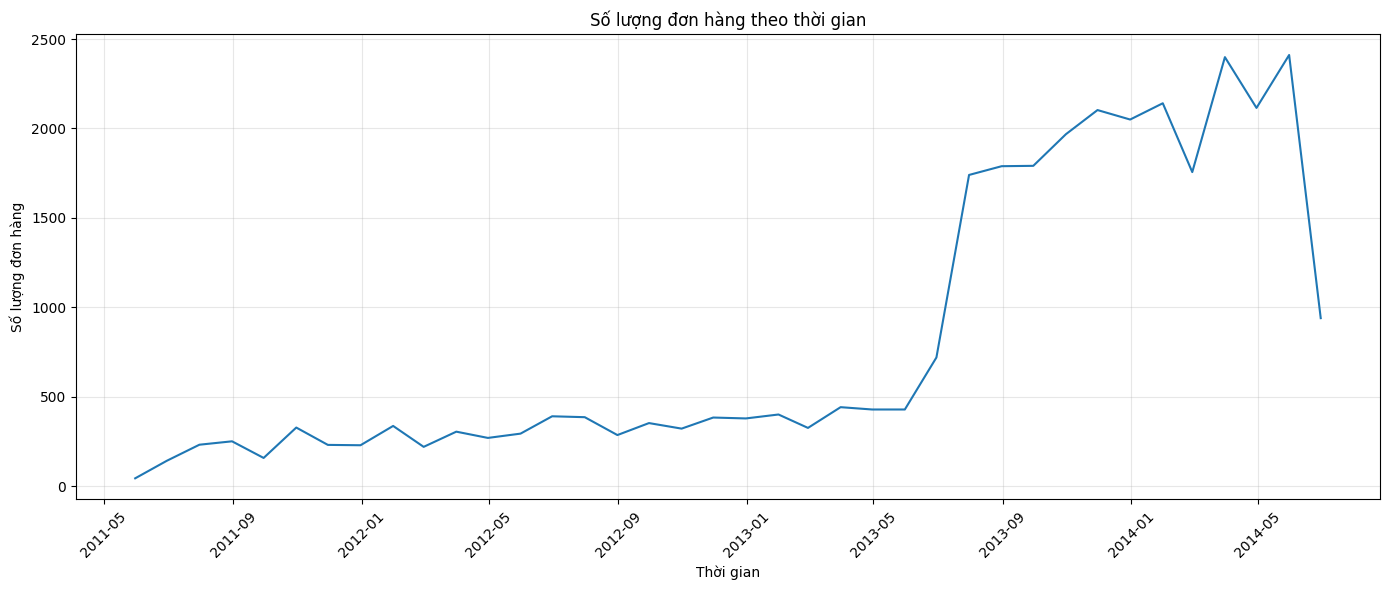

In [28]:
# Chuyển đổi index sang định dạng tháng-năm
order_quantity_time = order_quantity_by_time.copy()
order_quantity_time.index = pd.to_datetime(order_quantity_time.index)
order_by_month = order_quantity_time.resample('M').sum()

# Vẽ biểu đồ số lượng đơn hàng theo tháng
plt.figure(figsize=(14, 6))
plt.plot(order_by_month.index, order_by_month.values)
plt.xlabel('Thời gian')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng theo thời gian')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


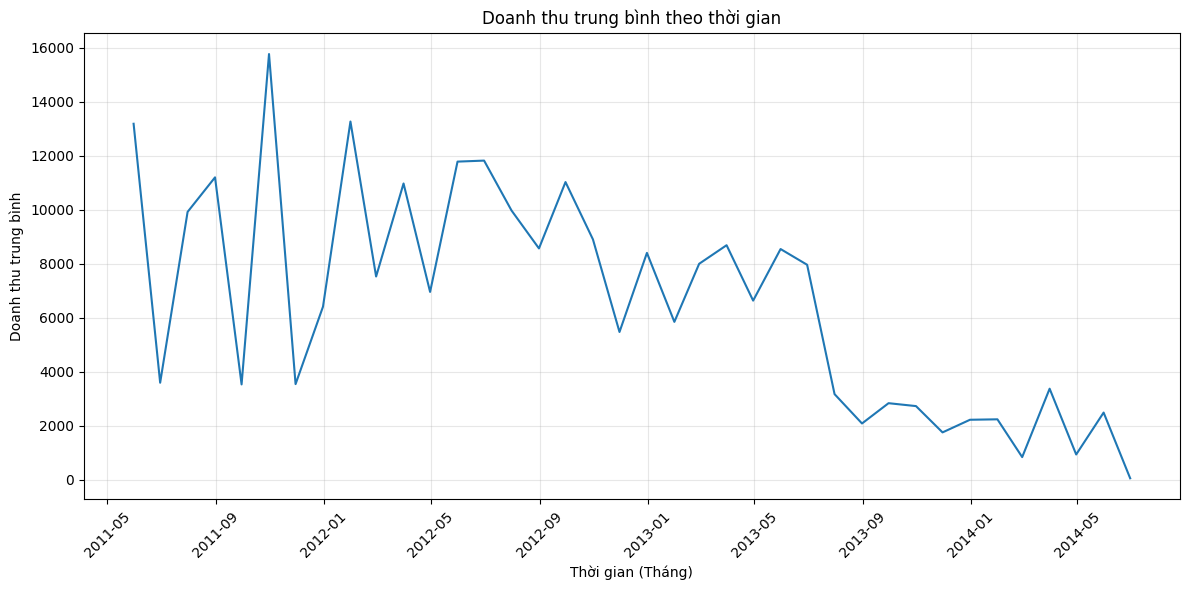

In [29]:
# Doanh thu trung bình theo thời gian (theo tháng)
mean_revenue_by_time = sale_header_df.copy()
mean_revenue_by_time['OrderDate'] = pd.to_datetime(mean_revenue_by_time['OrderDate'])
mean_revenue_by_time = mean_revenue_by_time.set_index('OrderDate')
mean_revenue_by_time = mean_revenue_by_time['TotalDue'].resample('M').mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_revenue_by_time.index, mean_revenue_by_time.values)
plt.xlabel('Thời gian (Tháng)')
plt.ylabel('Doanh thu trung bình')
plt.title('Doanh thu trung bình theo thời gian')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
revenue_nearly_zero = sale_header_df[sale_header_df["TotalDue"] <= 20]

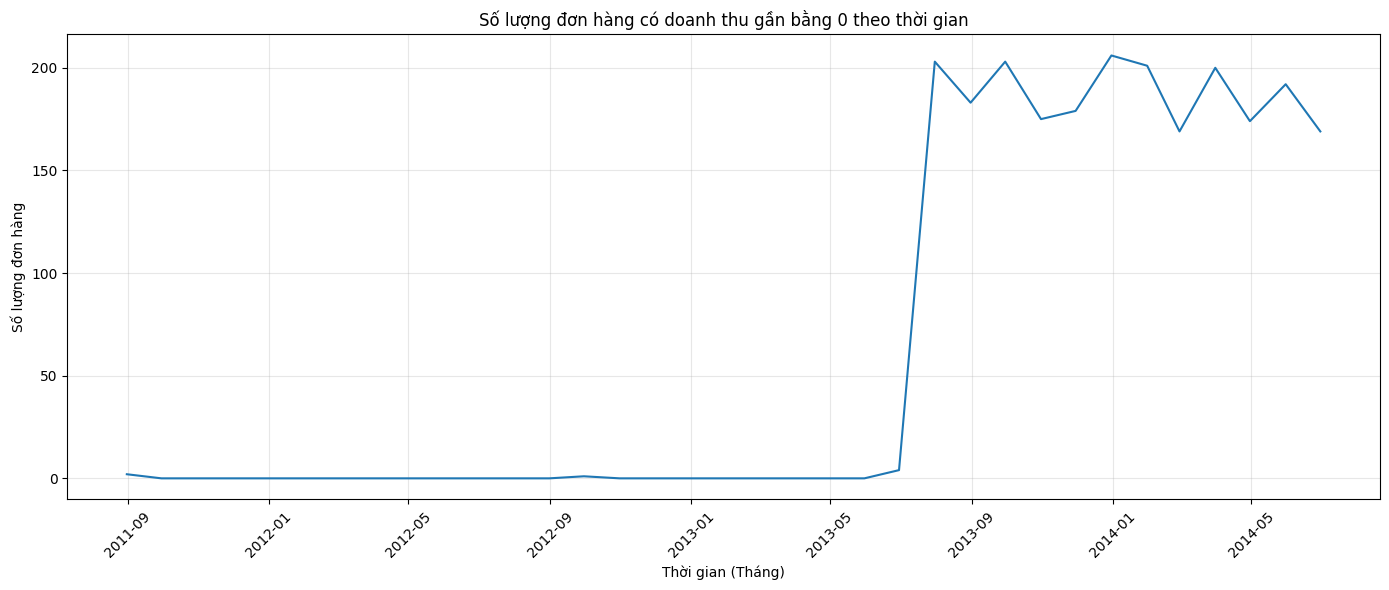

In [31]:
# Vẽ biểu đồ số lượng đơn hàng gần bằng 0 theo tháng
revenue_nearly_zero_time = revenue_nearly_zero.copy()
revenue_nearly_zero_time['OrderDate'] = pd.to_datetime(revenue_nearly_zero_time['OrderDate'])
revenue_nearly_zero_time = revenue_nearly_zero_time.set_index('OrderDate')
revenue_nearly_zero_count = revenue_nearly_zero_time['SalesOrderID'].resample('M').count()

plt.figure(figsize=(14, 6))
plt.plot(revenue_nearly_zero_count.index, revenue_nearly_zero_count.values)
plt.xlabel('Thời gian (Tháng)')
plt.ylabel('Số lượng đơn hàng')
plt.title('Số lượng đơn hàng có doanh thu gần bằng 0 theo thời gian')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

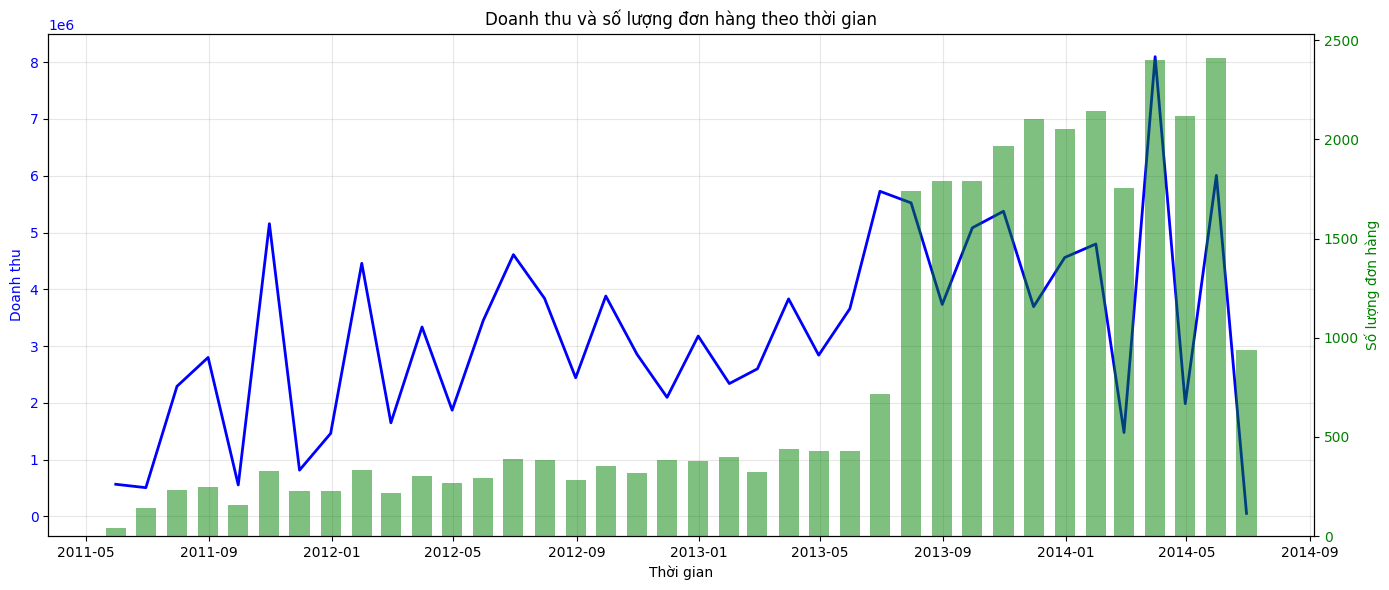

In [32]:
# Chuyển đổi dữ liệu sang định dạng tháng
revenue_by_month = revenue_by_time.copy()
revenue_by_month.index = pd.to_datetime(revenue_by_month.index)
revenue_by_month = revenue_by_month.resample('M').sum()

order_by_month_period = order_quantity_by_time.copy()
order_by_month_period.index = pd.to_datetime(order_by_month_period.index)
order_by_month_period = order_by_month_period.resample('M').sum()

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(revenue_by_month.index, revenue_by_month.values, 'b-', label='Doanh thu', linewidth=2)
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Doanh thu', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()
ax2.bar(order_by_month_period.index, order_by_month_period.values, alpha=0.5, color='g', label='Số lượng đơn hàng', width=20)
ax2.set_ylabel('Số lượng đơn hàng', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Doanh thu và số lượng đơn hàng theo thời gian')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

### Doanh thu, số lượng đơn hàng theo sản phẩm

#### 1. Sản phẩm nào hiện tại đóng góp nhiều doanh thu nhất ?

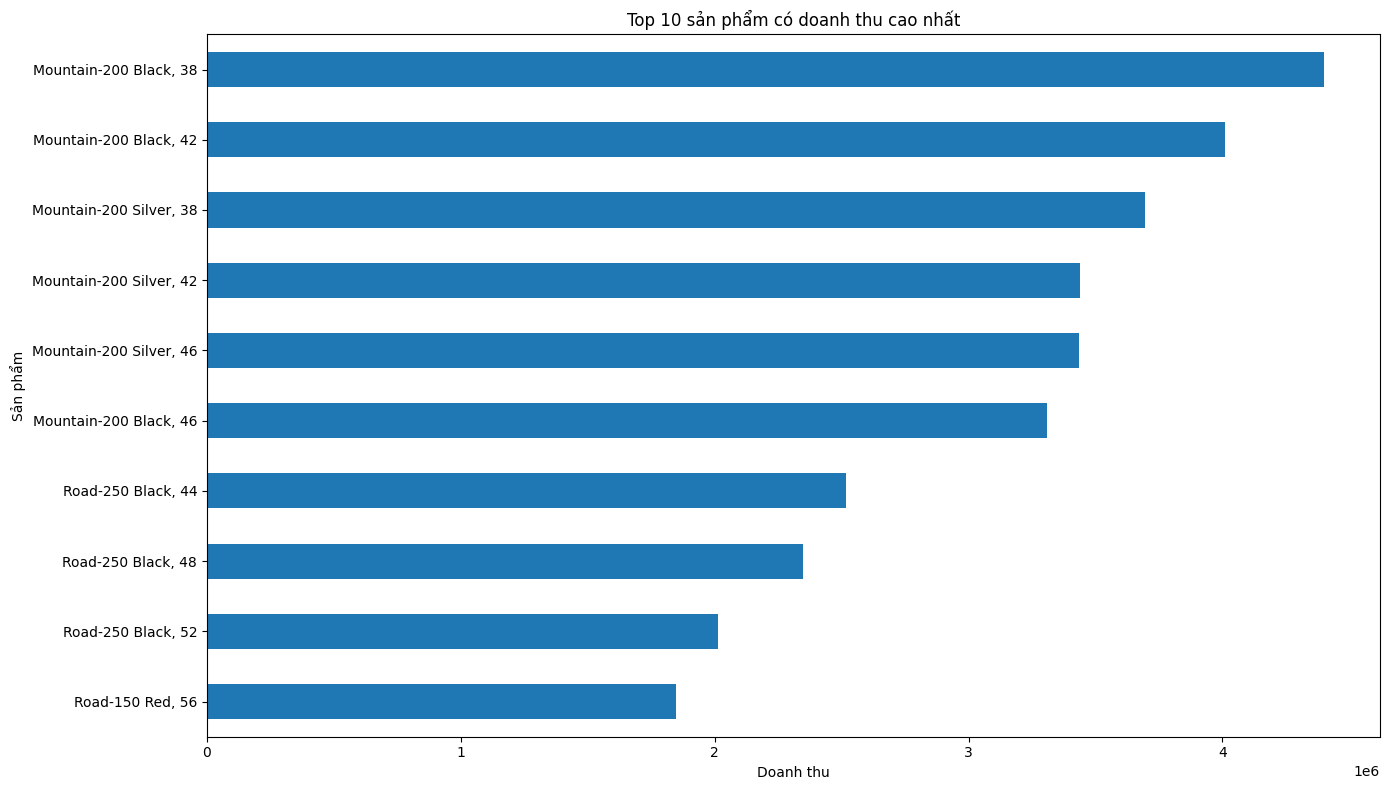

In [42]:
sale_join_prd = pd.merge(left=sale_detail_df, right=product_df, on='ProductID', how='left')
revenue_by_product = sale_join_prd.groupby('Name')['LineTotal'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
revenue_by_product.head(10).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Doanh thu')
plt.ylabel('Sản phẩm')
plt.title('Top 10 sản phẩm có doanh thu cao nhất')
plt.tight_layout()
plt.show()

#### 2. Sản phẩm nào ta bán ra được nhiều nhất ? Doanh thu trung bình tương ứng với sản phẩm đó là bao nhiêu ?

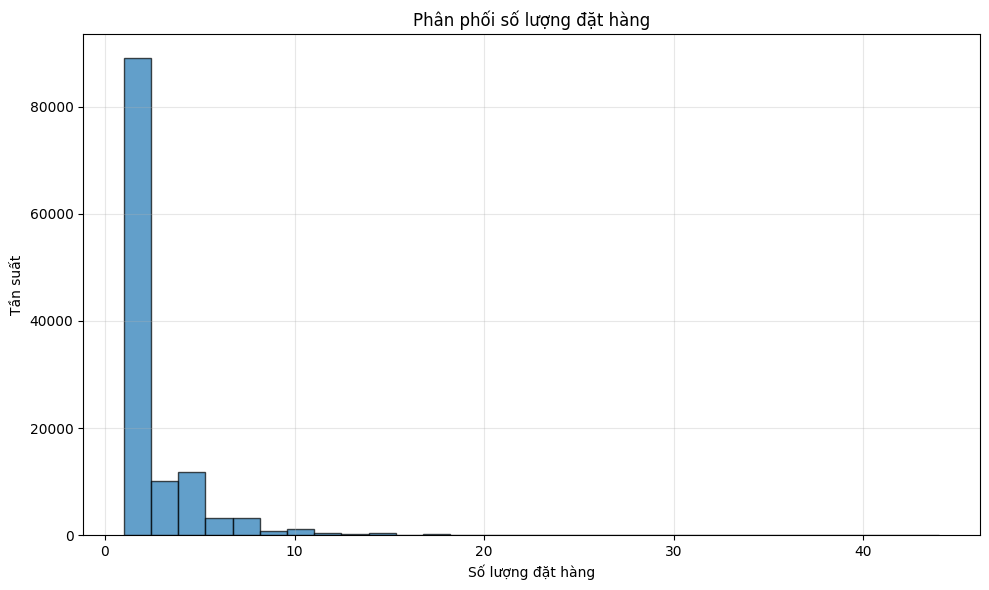

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(sale_detail_df["OrderQty"], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Số lượng đặt hàng')
plt.ylabel('Tần suất')
plt.title('Phân phối số lượng đặt hàng')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

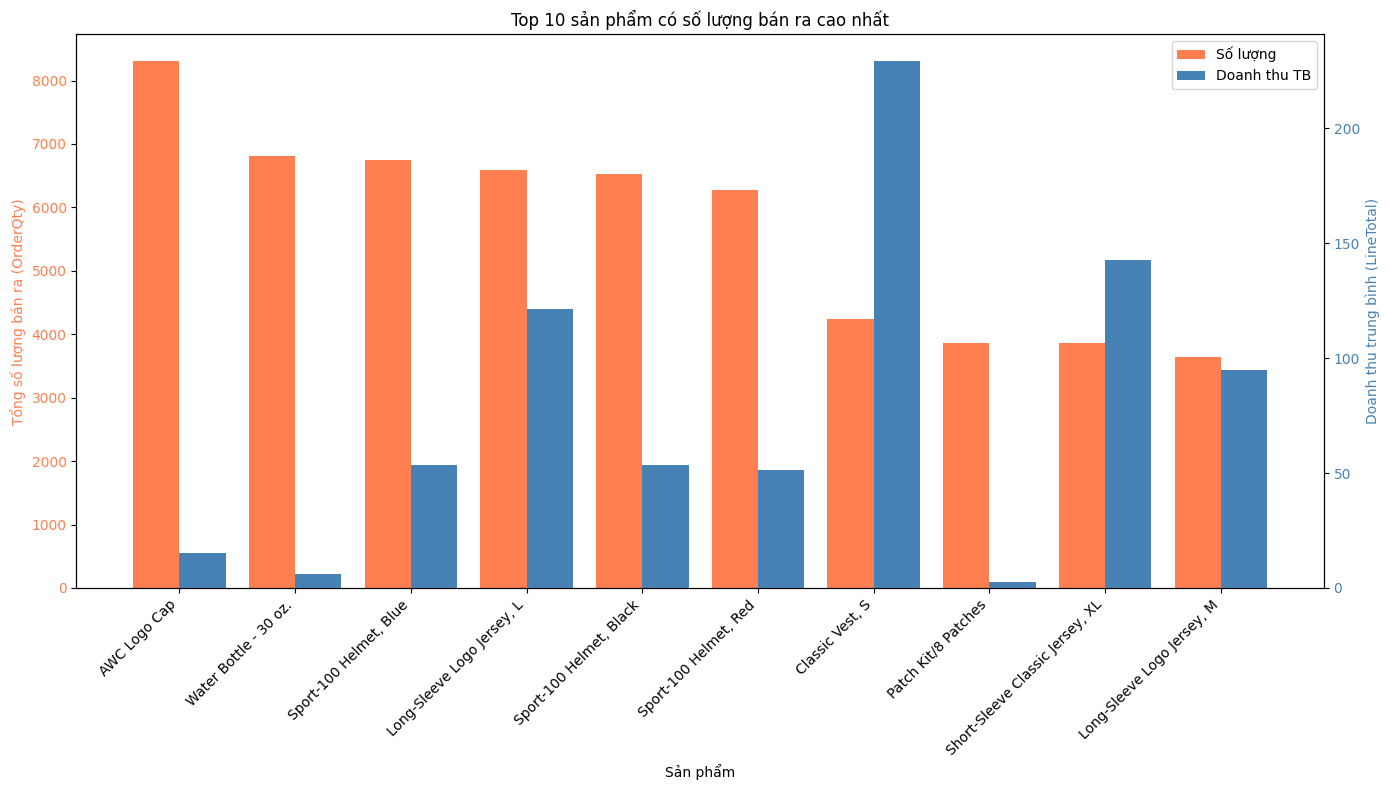

In [38]:
# Tính tổng số lượng bán ra và doanh thu trung bình cho mỗi sản phẩm
product_stats = sale_join_prd.groupby("Name").agg({
    "OrderQty": "sum",
    "LineTotal": "mean"
}).sort_values(by='OrderQty', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(14, 8))

x = range(len(product_stats))
products = product_stats.index

# Trục bên trái - Số lượng bán ra (OrderQty)
ax1.bar([i - 0.2 for i in x], product_stats["OrderQty"], width=0.4, color='coral', label='Số lượng')
ax1.set_xlabel('Sản phẩm')
ax1.set_ylabel('Tổng số lượng bán ra (OrderQty)', color='coral')
ax1.tick_params(axis='y', labelcolor='coral')
ax1.set_xticks(x)
ax1.set_xticklabels(products, rotation=45, ha='right')

# Trục bên phải - Doanh thu trung bình (LineTotal)
ax2 = ax1.twinx()
ax2.bar([i + 0.2 for i in x], product_stats["LineTotal"], width=0.4, color='steelblue', label='Doanh thu TB')
ax2.set_ylabel('Doanh thu trung bình (LineTotal)', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

# Thêm legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Top 10 sản phẩm có số lượng bán ra cao nhất')
fig.tight_layout()
plt.show()

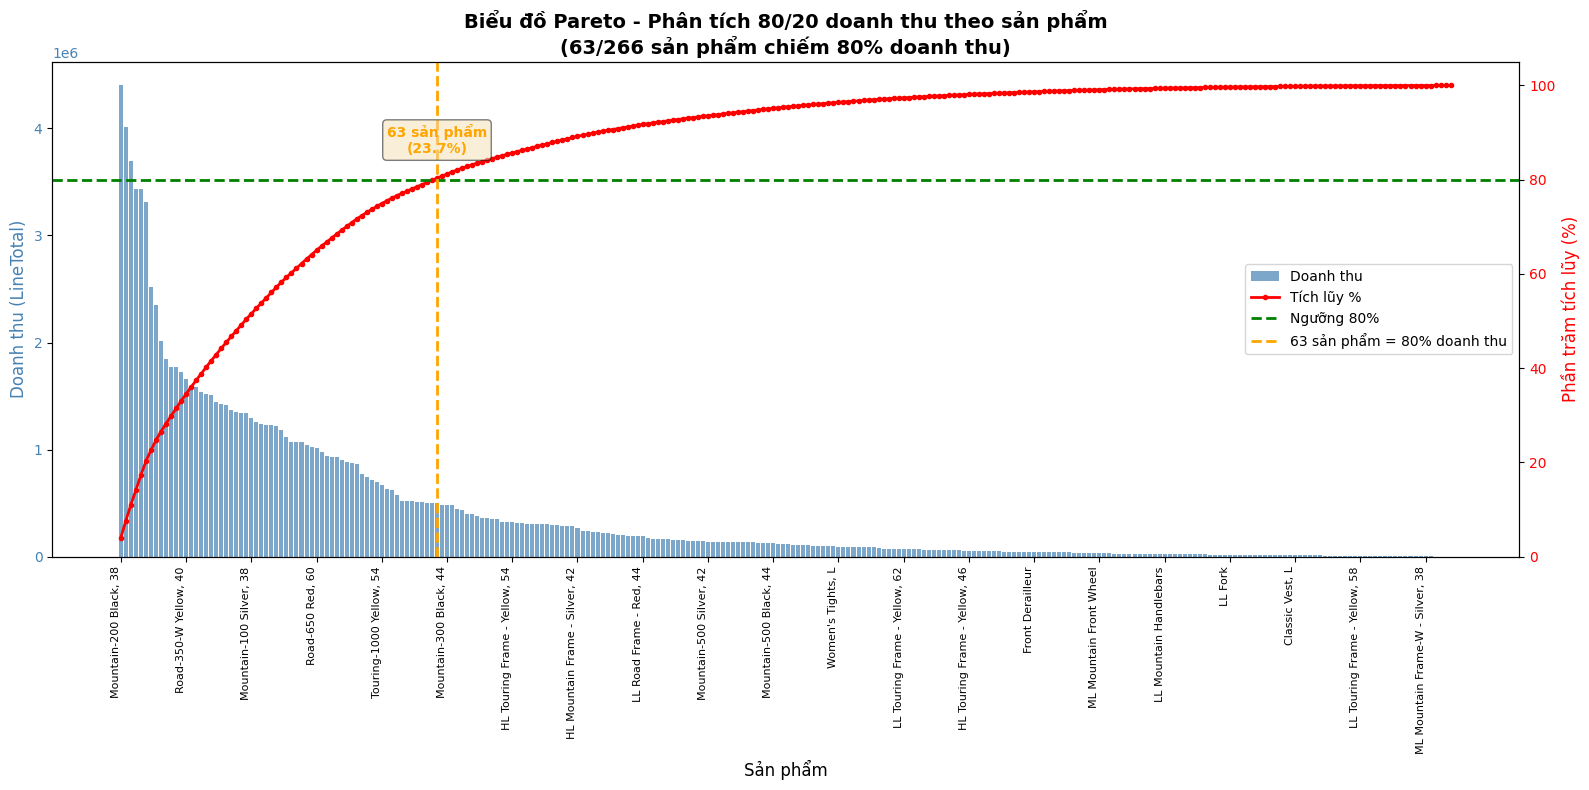


PHÂN TÍCH PARETO - QUY TẮC 80/20
Tổng số sản phẩm: 266
Số sản phẩm chiếm 80% doanh thu: 63 (23.68%)
Tổng doanh thu: $109,846,381.40
Doanh thu từ 63 sản phẩm hàng đầu: $87,741,348.82

Top 10 sản phẩm có doanh thu cao nhất:
------------------------------------------------------------
 1. Mountain-200 Black, 38                        $4,400,592.80 ( 4.01%)
 2. Mountain-200 Black, 42                        $4,009,494.76 ( 3.65%)
 3. Mountain-200 Silver, 38                       $3,693,678.03 ( 3.36%)
 4. Mountain-200 Silver, 42                       $3,438,478.86 ( 3.13%)
 5. Mountain-200 Silver, 46                       $3,434,256.94 ( 3.13%)
 6. Mountain-200 Black, 46                        $3,309,673.22 ( 3.01%)
 7. Road-250 Black, 44                            $2,516,857.31 ( 2.29%)
 8. Road-250 Black, 48                            $2,347,655.95 ( 2.14%)
 9. Road-250 Black, 52                            $2,012,447.77 ( 1.83%)
10. Road-150 Red, 56                              $1,847,81

In [39]:
# Phân tích Pareto - 80% doanh thu đến từ sản phẩm nào

# Tính tổng doanh thu cho mỗi sản phẩm
product_revenue = sale_join_prd.groupby("Name")["LineTotal"].sum().sort_values(ascending=False)

# Tính phần trăm tích lũy
cumulative_percentage = (product_revenue.cumsum() / product_revenue.sum()) * 100

# Tạo figure với 2 trục y
fig, ax1 = plt.subplots(figsize=(16, 8))

# Vẽ bar chart cho doanh thu
x = range(len(product_revenue))
ax1.bar(x, product_revenue.values, color='steelblue', alpha=0.7, label='Doanh thu')
ax1.set_xlabel('Sản phẩm', fontsize=12)
ax1.set_ylabel('Doanh thu (LineTotal)', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x[::max(1, len(x)//20)])  # Hiển thị mỗi 20 sản phẩm
ax1.set_xticklabels(product_revenue.index[::max(1, len(x)//20)], rotation=90, ha='right', fontsize=8)

# Vẽ đường tích lũy
ax2 = ax1.twinx()
ax2.plot(x, cumulative_percentage.values, color='red', marker='o', markersize=3, linewidth=2, label='Tích lũy %')
ax2.set_ylabel('Phần trăm tích lũy (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, 105])

# Vẽ đường 80%
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='Ngưỡng 80%')

# Tìm số sản phẩm chiếm 80% doanh thu
products_80 = (cumulative_percentage <= 80).sum()
ax2.axvline(x=products_80, color='orange', linestyle='--', linewidth=2, label=f'{products_80} sản phẩm = 80% doanh thu')

# Thêm text annotation
ax2.text(products_80, 85, f'{products_80} sản phẩm\n({products_80/len(product_revenue)*100:.1f}%)', 
         ha='center', va='bottom', fontsize=10, color='orange', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right', fontsize=10)

plt.title(f'Biểu đồ Pareto - Phân tích 80/20 doanh thu theo sản phẩm\n({products_80}/{len(product_revenue)} sản phẩm chiếm 80% doanh thu)', 
          fontsize=14, fontweight='bold')
fig.tight_layout()
plt.show()

# In thông tin chi tiết
print(f"\n{'='*60}")
print(f"PHÂN TÍCH PARETO - QUY TẮC 80/20")
print(f"{'='*60}")
print(f"Tổng số sản phẩm: {len(product_revenue)}")
print(f"Số sản phẩm chiếm 80% doanh thu: {products_80} ({products_80/len(product_revenue)*100:.2f}%)")
print(f"Tổng doanh thu: ${product_revenue.sum():,.2f}")
print(f"Doanh thu từ {products_80} sản phẩm hàng đầu: ${product_revenue.head(products_80).sum():,.2f}")
print(f"\nTop 10 sản phẩm có doanh thu cao nhất:")
print(f"{'-'*60}")
for i, (product, revenue) in enumerate(product_revenue.head(10).items(), 1):
    pct = (revenue / product_revenue.sum()) * 100
    print(f"{i:2d}. {product[:45]:45s} ${revenue:12,.2f} ({pct:5.2f}%)")


### Doanh thu, số lượng đơn hàng theo khu vực

In [43]:
sale_territory_df = pd.merge(left=sale_header_df, right=territory_df, on='TerritoryID', how='left')

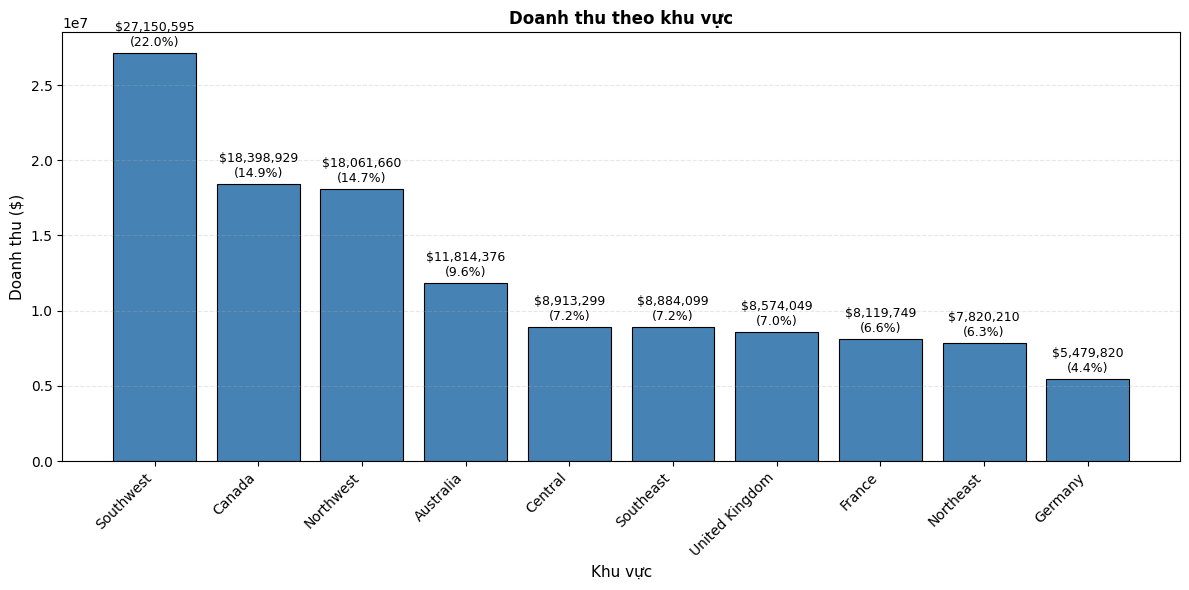

In [47]:
# Tính tổng doanh thu theo khu vực
territory_revenue = sale_territory_df.groupby('Name')['TotalDue'].sum().sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))

bars = plt.bar(range(len(territory_revenue)), territory_revenue.values, color='steelblue', edgecolor='black', linewidth=0.8)

# Thêm giá trị trên mỗi cột
for i, (bar, value) in enumerate(zip(bars, territory_revenue.values)):
    pct = (value / territory_revenue.sum()) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + territory_revenue.max()*0.01, 
             f'${value:,.0f}\n({pct:.1f}%)', 
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(len(territory_revenue)), territory_revenue.index, rotation=45, ha='right')
plt.ylabel('Doanh thu ($)', fontsize=11)
plt.xlabel('Khu vực', fontsize=11)
plt.title('Doanh thu theo khu vực', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

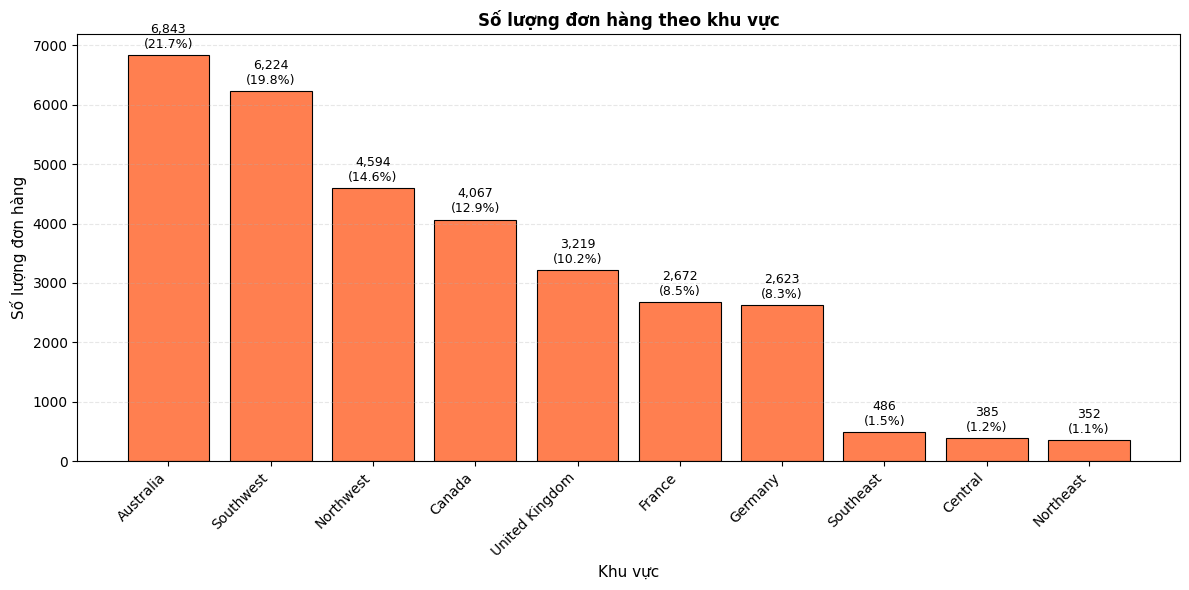

In [49]:
# Tính số lượng đơn hàng theo khu vực
territory_orders = sale_territory_df.groupby('Name')['SalesOrderID'].nunique().sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))

bars = plt.bar(range(len(territory_orders)), territory_orders.values, color='coral', edgecolor='black', linewidth=0.8)

# Thêm giá trị trên mỗi cột
for i, (bar, value) in enumerate(zip(bars, territory_orders.values)):
    pct = (value / territory_orders.sum()) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + territory_orders.max()*0.01, 
             f'{value:,}\n({pct:.1f}%)', 
             ha='center', va='bottom', fontsize=9)

plt.xticks(range(len(territory_orders)), territory_orders.index, rotation=45, ha='right')
plt.ylabel('Số lượng đơn hàng', fontsize=11)
plt.xlabel('Khu vực', fontsize=11)
plt.title('Số lượng đơn hàng theo khu vực', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

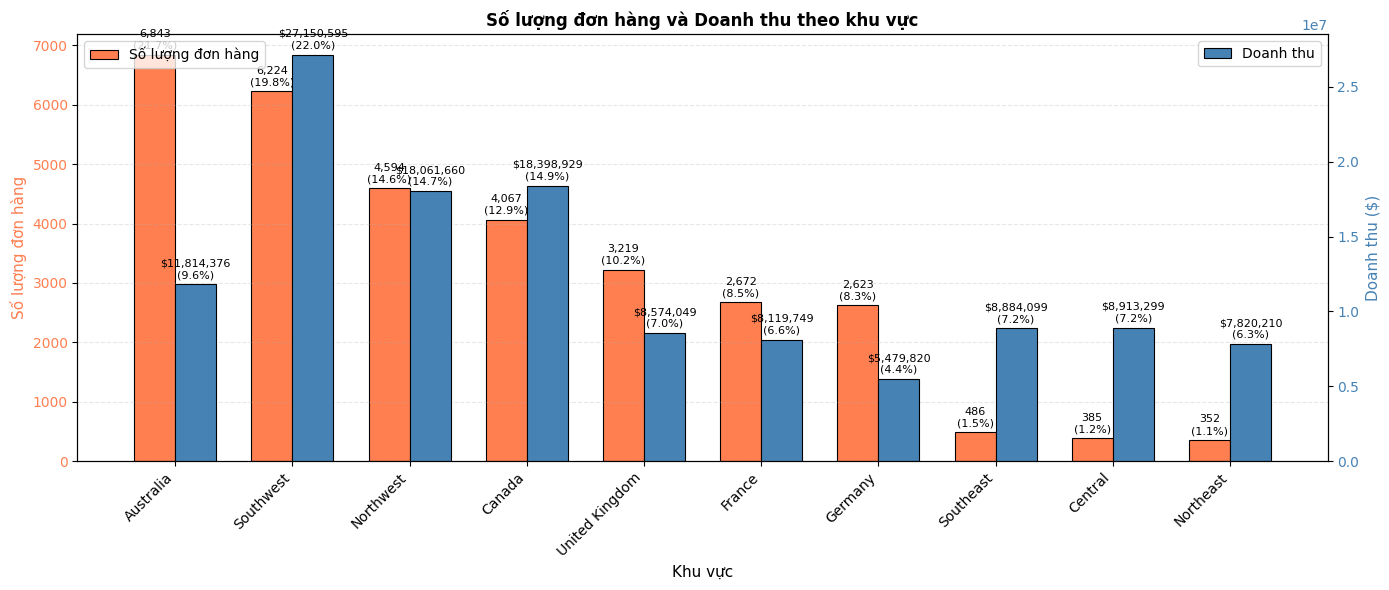

In [53]:
# Tạo figure với 1 subplot
fig, ax = plt.subplots(figsize=(14, 6))

# Sắp xếp dữ liệu theo thứ tự giống nhau cho cả 2 biểu đồ
# Sử dụng thứ tự của territory_orders làm chuẩn
common_territories = territory_orders.index

# Thiết lập vị trí các cột
x = np.arange(len(common_territories))
width = 0.35  # Độ rộng của mỗi cột

# Chuẩn hóa dữ liệu để hiển thị trên cùng một trục
# Sử dụng trục y phụ cho doanh thu
ax2 = ax.twinx()

# Vẽ cột số lượng đơn hàng
bars1 = ax.bar(x - width/2, 
               [territory_orders[t] for t in common_territories], 
               width, label='Số lượng đơn hàng',
               color='coral', edgecolor='black', linewidth=0.8)

# Vẽ cột doanh thu
bars2 = ax2.bar(x + width/2, 
                [territory_revenue[t] for t in common_territories], 
                width, label='Doanh thu',
                color='steelblue', edgecolor='black', linewidth=0.8)

# Thêm giá trị trên mỗi cột đơn hàng
for i, territory in enumerate(common_territories):
    value = territory_orders[territory]
    pct = (value / territory_orders.sum()) * 100
    ax.text(i - width/2, value + territory_orders.max()*0.01,
            f'{value:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=8)

# Thêm giá trị trên mỗi cột doanh thu
for i, territory in enumerate(common_territories):
    value = territory_revenue[territory]
    pct = (value / territory_revenue.sum()) * 100
    ax2.text(i + width/2, value + territory_revenue.max()*0.01,
             f'${value:,.0f}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=8)

# Thiết lập trục x
ax.set_xticks(x)
ax.set_xticklabels(common_territories, rotation=45, ha='right')
ax.set_xlabel('Khu vực', fontsize=11)

# Thiết lập trục y
ax.set_ylabel('Số lượng đơn hàng', fontsize=11, color='coral')
ax.tick_params(axis='y', labelcolor='coral')
ax2.set_ylabel('Doanh thu ($)', fontsize=11, color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

# Tiêu đề và legend
ax.set_title('Số lượng đơn hàng và Doanh thu theo khu vực', fontsize=12, fontweight='bold')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


### Xác định các yếu tố ảnh hưởng lớn nhất đến doanh thu (sản phẩm, khu vực, loại khách hàng).

### 1. Nối các bảng lại với nhau tạo thành 1 bảng flat duy nhất

In [62]:
flat_df = pd.merge(sale_detail_df, sale_header_df, on='SalesOrderID', how='left', suffixes=('_detail', '_header'))
flat_df = pd.merge(flat_df, customer_df, on='CustomerID', how='left', suffixes=('', '_customer'))
flat_df = pd.merge(flat_df, person_df, left_on='PersonID', right_on='BusinessEntityID', how='left', suffixes=('', '_person'))
flat_df = pd.merge(flat_df, product_df, on='ProductID', how='left', suffixes=('', '_product'))
flat_df = pd.merge(flat_df, territory_df, on='TerritoryID', how='left', suffixes=('', '_territory'))

In [77]:
analysis_df = flat_df.copy()
analysis_df = analysis_df[[
                           'LineTotal',
                           "Name",
                           "Name_territory", 
                           "Group",
                           "PersonType"
                           ]]

In [78]:
analysis_df.head()

,LineTotal,Name,Name_territory,Group,PersonType
0,2024.994,"Mountain-100 Black, 42",Southeast,North America,SC
1,6074.982,"Mountain-100 Black, 44",Southeast,North America,SC
2,2024.994,"Mountain-100 Black, 48",Southeast,North America,SC
3,2039.994,"Mountain-100 Silver, 38",Southeast,North America,SC
4,2039.994,"Mountain-100 Silver, 42",Southeast,North America,SC


In [79]:
analysis_df.isnull().sum()

LineTotal         0
Name              0
Name_territory    0
Group             0
PersonType        0
dtype: int64

In [80]:
categorical_cols = ['Name', 'Name_territory', 'Group', 'PersonType']
for col in categorical_cols:
    analysis_df[col] = analysis_df[col].astype('category')

In [81]:
import statsmodels.formula.api as smf

formula = "LineTotal ~ C(Name) + C(Name_territory) + C(Group) + C(PersonType)"
ols_model = smf.ols(formula=formula, data=analysis_df).fit()

print(ols_model.summary().tables[0])  # xem nhanh thông tin chung

                            OLS Regression Results                            
Dep. Variable:              LineTotal   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     679.3
Date:                Sat, 01 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:49:39   Log-Likelihood:            -1.0174e+06
No. Observations:              121317   AIC:                         2.035e+06
Df Residuals:                  121041   BIC:                         2.038e+06
Df Model:                         275                                         
Covariance Type:            nonrobust                                         


In [82]:
from statsmodels.stats.anova import anova_lm

anova_tbl = anova_lm(ols_model, typ=2)
anova_tbl['eta_sq'] = anova_tbl['sum_sq'] / anova_tbl['sum_sq'].sum()
anova_tbl = anova_tbl.sort_values('eta_sq', ascending=False)

anova_tbl[['sum_sq', 'df', 'F', 'PR(>F)', 'eta_sq']]

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 2
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F),eta_sq
C(Name),1.889723e+11,265.0,631.043308,0.00000,0.568083
Residual,1.367810e+11,121041.0,NaN,NaN,0.411187
C(PersonType),6.892787e+09,1.0,6099.604456,0.00000,0.020721
C(Name_territory),2.525764e+06,9.0,0.248346,0.78009,0.000008
C(Group),5.612808e+05,2.0,0.248346,0.78009,0.000002
